Using Multithreading with the xgboost API

In [33]:
import numpy as np
import xgboost as xgb
import pandas as pd
import sklearn
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv('datasets/otto-data.csv')
print(data.shape)
X,Y = data.iloc[:,:-1], data.iloc[:,-1]
print(X.shape, Y.shape)
#print(Y)
print(Y.dtype)
Y = sklearn.preprocessing.LabelEncoder().fit_transform(Y)
print(Y.dtype)import numpy as np
import xgboost as xgb
import pandas as pd
import sklearn
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

(61878, 95)
(61878, 94) (61878,)
object
int64


In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

Accuracy: 99.99%
1 62.76583242416382
Accuracy: 99.99%
2 31.432397842407227
Accuracy: 99.99%
3 29.612934827804565
Accuracy: 99.99%
4 29.23178791999817


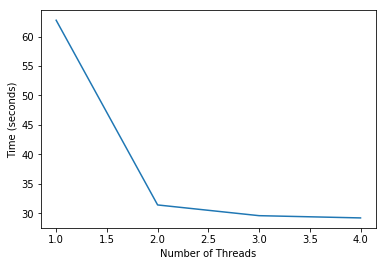

In [23]:
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    start = time.time()
    model = xgb.XGBClassifier(nthread=n)
    model.fit(X_train, y_train)
    elapsed = time.time() - start
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

    print(n, elapsed)
    results.append(elapsed)
# plot results
plt.plot(num_threads, results)
plt.ylabel('Time (seconds)')
plt.xlabel('Number of Threads')
plt.show()

Tuning Num Trees and Max Depth

In [24]:
import numpy as np
import xgboost as xgb
import pandas as pd
import sklearn
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
data = pd.read_csv('datasets/otto-data.csv')
print(data.shape)
X,Y = data.iloc[:,:-1], data.iloc[:,-1]
print(X.shape, Y.shape)
#print(Y)
print(Y.dtype)
Y = sklearn.preprocessing.LabelEncoder().fit_transform(Y)
print(Y.dtype)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

(61878, 95)
(61878, 94) (61878,)
object
int64


In [31]:
#Will use Grid Search to Tune Hyperparameters
model = xgb.XGBClassifier()
n_estimators = [20, 50, 150, 250]
max_depth = [1,3,5,10,15]

param_grid = dict(max_depth=max_depth, n_estimators = n_estimators)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=3, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 10.6min
/home/harsh/.local/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed: 90.4min
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed: 95.5min finished


Printing Log Loss
Best: -0.000716 using {'max_depth': 5, 'n_estimators': 250}
-0.596846 (0.001574) with: {'max_depth': 1, 'n_estimators': 20}
-0.169333 (0.001324) with: {'max_depth': 1, 'n_estimators': 50}
-0.004817 (0.000947) with: {'max_depth': 1, 'n_estimators': 150}
-0.001021 (0.001347) with: {'max_depth': 1, 'n_estimators': 250}
-0.199528 (0.001156) with: {'max_depth': 3, 'n_estimators': 20}
-0.010779 (0.000822) with: {'max_depth': 3, 'n_estimators': 50}
-0.000749 (0.001184) with: {'max_depth': 3, 'n_estimators': 150}
-0.000744 (0.001180) with: {'max_depth': 3, 'n_estimators': 250}
-0.194785 (0.000792) with: {'max_depth': 5, 'n_estimators': 20}
-0.010110 (0.000751) with: {'max_depth': 5, 'n_estimators': 50}
-0.000720 (0.001121) with: {'max_depth': 5, 'n_estimators': 150}
-0.000716 (0.001118) with: {'max_depth': 5, 'n_estimators': 250}
-0.193820 (0.000676) with: {'max_depth': 10, 'n_estimators': 20}
-0.010139 (0.000743) with: {'max_depth': 10, 'n_estimators': 50}
-0.000741 (0.00111

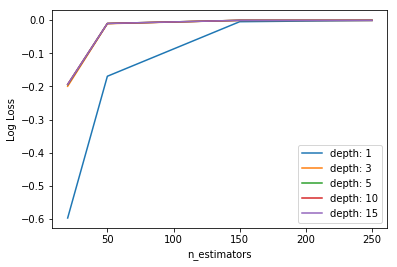

In [35]:
# summarize results
print("Printing Log Loss")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()